## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Data Cleaning

## Import and Preview

In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import datetime
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# import dataset
df = pd.read_csv("/Users/jrchen/flatiron-ds-course/Milestones/dsc-phase-2-project-online/data/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
# preview the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


## Check duplicated

In [4]:
# check duplicated values
df.duplicated().sum(), df.duplicated(subset=['id']).sum()

(0, 177)

It looks that no all duplicated values but have 177 duplicated id (the reason I only check the id columns is that id column is a unique column for this dataset and normally have no duplicated values)

Next, I am going to dig deeper about these duplicated id

In [5]:
# create a function to check those duplicated id column by column
def check_duplicate(df):
    check_list = df.columns
    duplicated_list = []
    unique_list = []
    for i in check_list:
        if df.duplicated(subset=[i]).sum() > 0:
            duplicated_list.append(i)
        else:
            unique_list.append(i)
    print ('duplicated columns: {}'.format(duplicated_list))
    print ('unique columns: {}'.format(unique_list))

In [6]:
# check those duplicated id using above function
duplicated_id = list(df[df.duplicated(subset=['id'])]['id'])
for i in duplicated_id:
    temp = df.loc[df['id'] == i]
    check_duplicate(temp)

duplicated columns: ['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
unique columns: ['date', 'price']
duplicated columns: ['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
unique columns: ['date', 'price']
duplicated columns: ['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
unique columns: ['date', 'price', 'waterfront']
duplicated columns: ['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqf

duplicated columns: ['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
unique columns: ['date', 'price']
duplicated columns: ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
unique columns: ['date', 'waterfront']
duplicated columns: ['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
unique columns: ['date', 'price']
duplicated columns: ['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqf

duplicated columns: ['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
unique columns: ['date', 'price']
duplicated columns: ['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
unique columns: ['date', 'price']
duplicated columns: ['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
unique columns: ['date', 'price']
duplicated columns: ['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqf

duplicated columns: ['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
unique columns: ['date', 'price']
duplicated columns: ['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
unique columns: ['date', 'price', 'yr_renovated']
duplicated columns: ['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
unique columns: ['date', 'price']
duplicated columns: ['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqf

duplicated columns: ['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
unique columns: ['date', 'price']
duplicated columns: ['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
unique columns: ['date', 'price']
duplicated columns: ['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
unique columns: ['date', 'price']
duplicated columns: ['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqf

duplicated columns: ['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
unique columns: ['date', 'price']
duplicated columns: ['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
unique columns: ['date', 'price', 'yr_renovated']
duplicated columns: ['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
unique columns: ['date', 'price']
duplicated columns: ['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqf

All the result show that these duplicated id with other duplicated columns except date and price columns. It is said that they are the same house but in two or more trading. 

Therefore, they only have different date and price.

In [7]:
# an example
df.loc[df['id']==8820903380]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
717,8820903380,7/28/2014,452000.0,6,2.25,2660,13579,2.0,0.0,0.0,...,7,2660,0.0,1937,1990.0,98125,47.7142,-122.286,1120,8242
718,8820903380,1/2/2015,730000.0,6,2.25,2660,13579,2.0,0.0,0.0,...,7,2660,0.0,1937,1990.0,98125,47.7142,-122.286,1120,8242


Next, I am going to only keep those newest one in our data by droping the older one.

In [8]:
# change the type of date to datetime for comparing
df['date'] = df['date'].map(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y'))

In [9]:
# create a drop list to contain those oldest duplicate values
drop_list = []
for i in duplicated_id:
    # a dictionary to sotre each value(date) by the key (index)
    container = {}
    temp = df.loc[df['id'] == i]
    for idx, date in zip(temp.index, temp['date']):
        container[idx] = date
    # sort the dictionary by values
    sort_orders = sorted(container.items(), key=lambda x: x[1], reverse=True)
    # remove the newest one and others will go into the drop list
    sort_orders.pop(0)
    for a in sort_orders:
        drop_list.append(a[0])

In [10]:
# drop those dulicated id following the drop list
df.drop(index=drop_list, inplace=True)

In [11]:
# check again
df.duplicated().sum(), df.duplicated(subset=['id']).sum()

(0, 0)

## Check NA Values

In [12]:
# check na values
df.isna().sum() / df.shape[0]

id               0.000000
date             0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.109851
view             0.002941
condition        0.000000
grade            0.000000
sqft_above       0.000000
sqft_basement    0.000000
yr_built         0.000000
yr_renovated     0.178011
zipcode          0.000000
lat              0.000000
long             0.000000
sqft_living15    0.000000
sqft_lot15       0.000000
dtype: float64

In [13]:
# There are total three columns have na values. Luckily, the na values are low percentiles of the dataset.
# I am going to drop them
# Drop na values and check again
df.dropna(inplace=True)
df.isna().sum() / df.shape[0]

id               0.0
date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64

In [14]:
df.shape

(15636, 21)

## Manipulate some columns type

In [15]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15636 entries, 1 to 21596
Data columns (total 21 columns):
id               15636 non-null int64
date             15636 non-null datetime64[ns]
price            15636 non-null float64
bedrooms         15636 non-null int64
bathrooms        15636 non-null float64
sqft_living      15636 non-null int64
sqft_lot         15636 non-null int64
floors           15636 non-null float64
waterfront       15636 non-null float64
view             15636 non-null float64
condition        15636 non-null int64
grade            15636 non-null int64
sqft_above       15636 non-null int64
sqft_basement    15636 non-null object
yr_built         15636 non-null int64
yr_renovated     15636 non-null float64
zipcode          15636 non-null int64
lat              15636 non-null float64
long             15636 non-null float64
sqft_living15    15636 non-null int64
sqft_lot15       15636 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(11), object(1)
memory 

From the info, we see that sqft_basement column is a object type. Let's dig deeper into it.

In [17]:
df['sqft_basement'].unique()

array(['400.0', '910.0', '0.0', '1530.0', '?', '730.0', '300.0', '970.0',
       '760.0', '720.0', '820.0', '780.0', '790.0', '330.0', '1620.0',
       '360.0', '588.0', '1510.0', '990.0', '600.0', '550.0', '1000.0',
       '1600.0', '1700.0', '500.0', '700.0', '1040.0', '1010.0', '240.0',
       '290.0', '800.0', '540.0', '560.0', '840.0', '770.0', '570.0',
       '1490.0', '620.0', '650.0', '180.0', '1130.0', '450.0', '1640.0',
       '1460.0', '1020.0', '1030.0', '750.0', '640.0', '1070.0', '1310.0',
       '630.0', '2000.0', '390.0', '210.0', '1950.0', '440.0', '220.0',
       '1160.0', '580.0', '2060.0', '1820.0', '1180.0', '380.0', '1150.0',
       '1200.0', '680.0', '1450.0', '1170.0', '1080.0', '960.0', '280.0',
       '870.0', '1250.0', '1100.0', '1400.0', '530.0', '490.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', '690.0', '270.0',
       '350.0', '935.0', '200.0', '850.0', '1470.0', '160.0', '950.0',
       '1370.0', '460.0', '50.0', '710.0', '1900.0', 

Form the unique value list, there is a ? value in the first low. Let's check more.

In [18]:
# check the percentile of these ? value
df.loc[df['sqft_basement']=='?'].shape[0] / df.shape[0]

0.021169096955743157

In [19]:
# drop rows with ? value
df.drop(index=df.loc[df['sqft_basement']=='?'].index, inplace=True)
df.shape

(15305, 21)

In [20]:
# Now we convert them into float type and double check
df = df.astype({'sqft_basement': 'float64'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15305 entries, 1 to 21596
Data columns (total 21 columns):
id               15305 non-null int64
date             15305 non-null datetime64[ns]
price            15305 non-null float64
bedrooms         15305 non-null int64
bathrooms        15305 non-null float64
sqft_living      15305 non-null int64
sqft_lot         15305 non-null int64
floors           15305 non-null float64
waterfront       15305 non-null float64
view             15305 non-null float64
condition        15305 non-null int64
grade            15305 non-null int64
sqft_above       15305 non-null int64
sqft_basement    15305 non-null float64
yr_built         15305 non-null int64
yr_renovated     15305 non-null float64
zipcode          15305 non-null int64
lat              15305 non-null float64
long             15305 non-null float64
sqft_living15    15305 non-null int64
sqft_lot15       15305 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(11)
memory usage: 2.6

## Check Inflated Zero Features

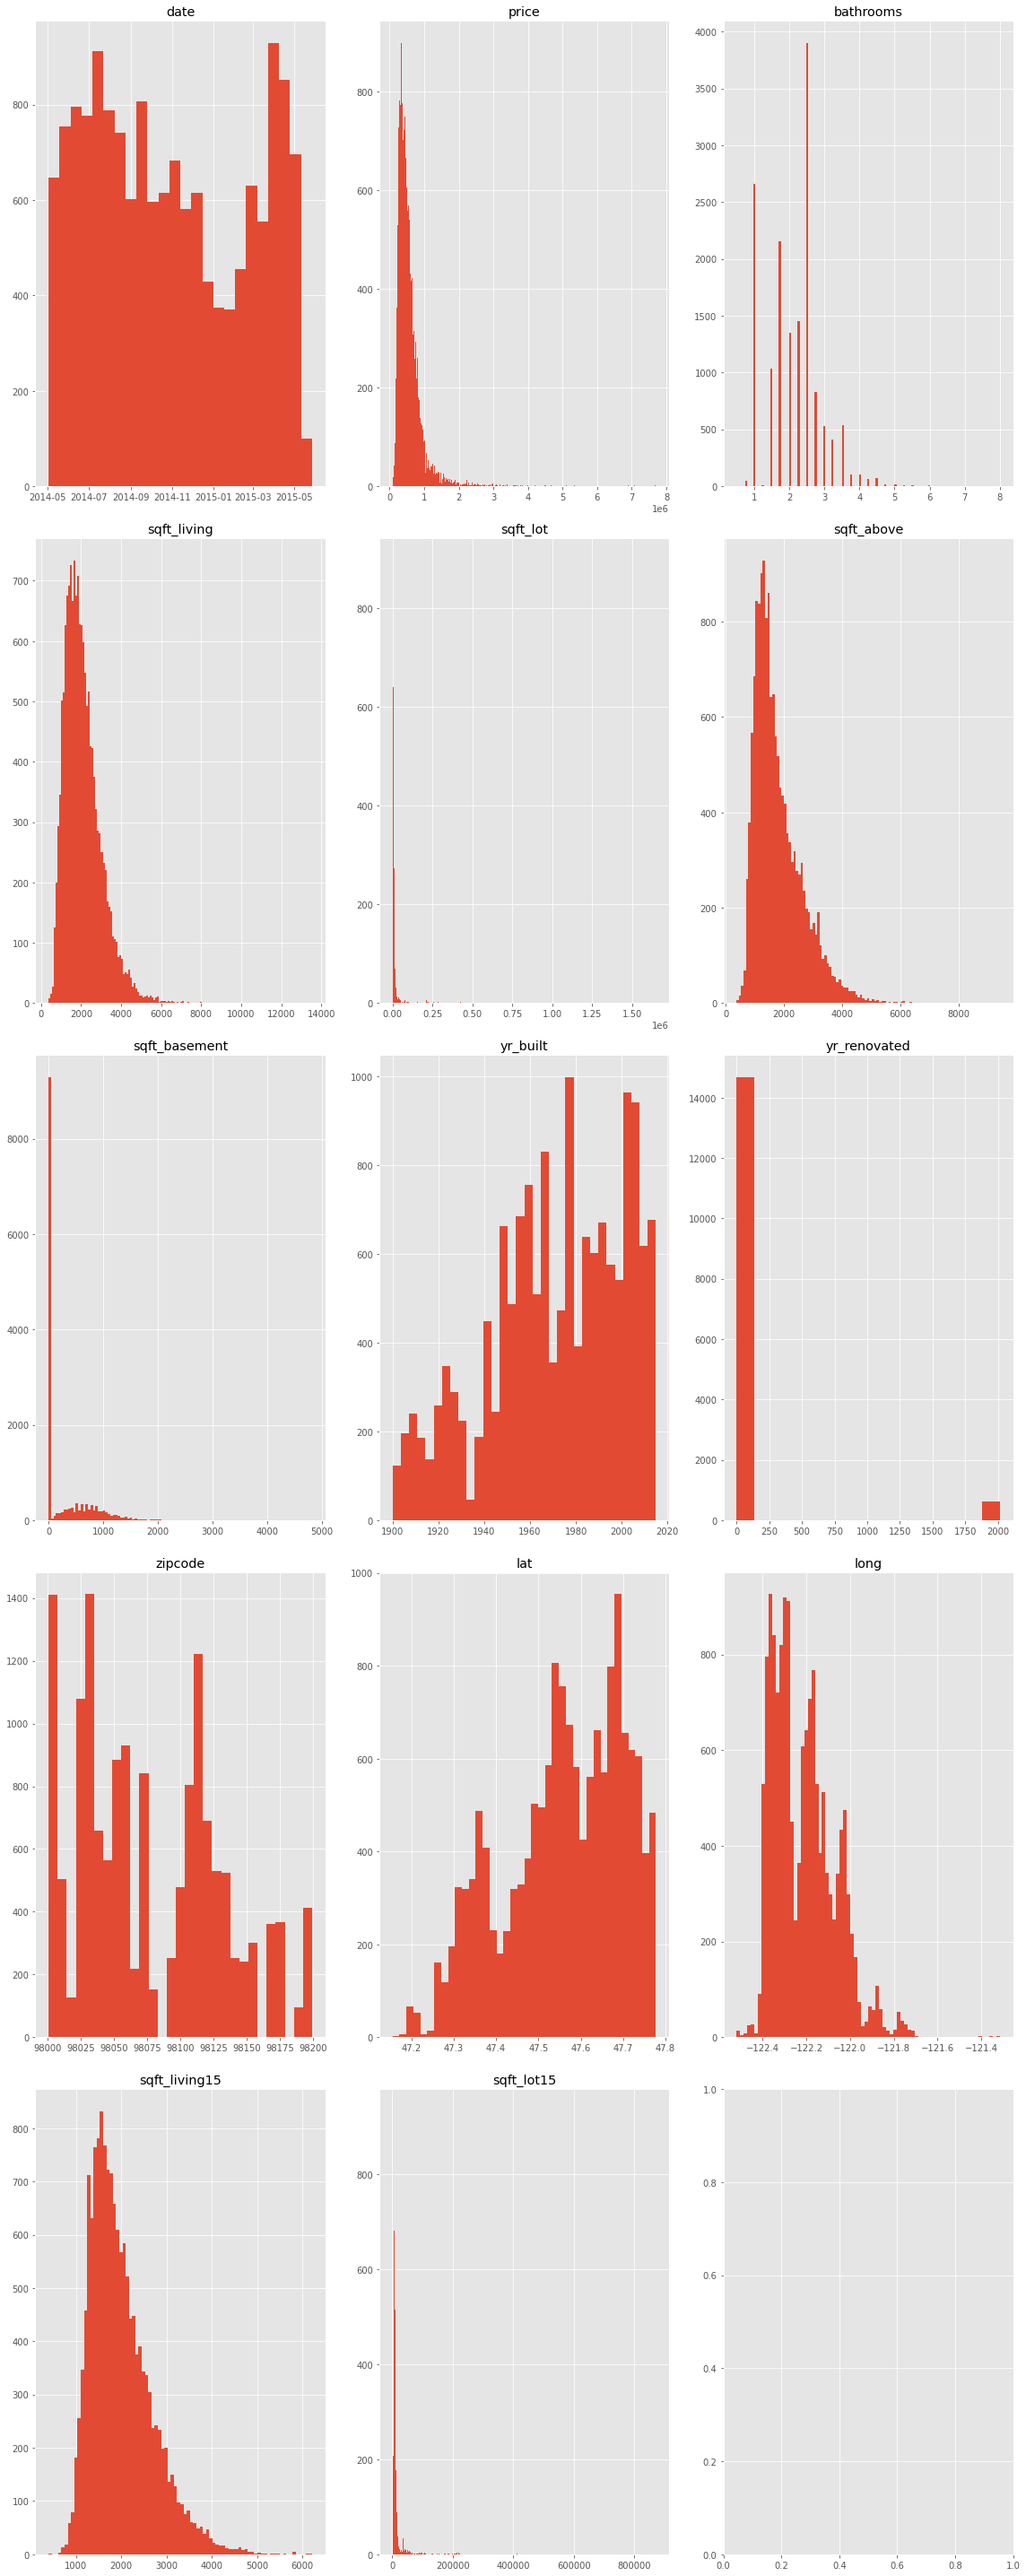

In [21]:
cat_data = df.loc[:, ((df.dtypes != 'object') & (df.nunique() > 20))]

fig, axes = plt.subplots(nrows=(cat_data.shape[1] // 3), ncols=3, figsize=(16,40))

categoricals = [column for column in cat_data.columns if column != 'id']

for col, ax in zip(categoricals, axes.flatten()):
    ax.hist(df[col].dropna(), bins='auto')
    ax.set_title(col)
    
fig.tight_layout()

We can see from our histogram of the continuous features that there are many examples where there are a ton of zeros. For example, sqft_basement (square footage of basement) gives us a positive number indicating the size of the basement and zero if no basement exists. It might have made sense to categorize this variable to "basement exists or not (binary variable 1/0).

From above, we found the columns with ton of zeros are sqft_basement and yr_renovated.

In [22]:
# convert sqft_basement and yr_renovated to binary avriable 1/0 columns and change the columns name
df.loc[df['sqft_basement']>0, ['sqft_basement']] = 1
df.loc[df['yr_renovated']>0, ['yr_renovated']] = 1
df.rename(columns={'sqft_basement': 'basement_exist', 'yr_renovated': 'renovated'}, inplace=True)

In [23]:
# double check
df['basement_exist'].unique(), df['renovated'].unique()

(array([1., 0.]), array([1., 0.]))

## Check Outliers and Erroneous Values

In [24]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,basement_exist,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.530500e+04,1.530500e+04,15305.000000,15305.000000,15305.000000,1.530500e+04,15305.000000,15305.000000,15305.000000,15305.000000,15305.000000,15305.000000,15305.000000,15305.000000,15305.000000,15305.000000,15305.000000,15305.000000,15305.000000,15305.000000
mean,4.594752e+09,5.429128e+05,3.379484,2.123636,2087.854623,1.531785e+04,1.496472,0.007579,0.229206,3.412022,7.668344,1796.046913,0.393205,1971.209670,0.041098,98077.349820,47.559296,-122.213317,1992.389350,12883.456910
std,2.874890e+09,3.733018e+05,0.933630,0.766891,920.015344,4.212319e+04,0.539132,0.086731,0.759757,0.651298,1.172312,829.964441,0.488478,29.311491,0.198523,53.398782,0.138810,0.140529,684.952271,27876.204735
min,1.000102e+06,8.250000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.126059e+09,3.238000e+05,3.000000,1.750000,1430.000000,5.048000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98032.000000,47.469000,-122.328000,1490.000000,5100.000000
50%,3.905082e+09,4.520000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.571500,-122.228000,1850.000000,7622.000000
75%,7.334501e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,1.000000,1997.000000,0.000000,98117.000000,47.677500,-122.124000,2370.000000,10108.000000
max,9.895000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,1.000000,2015.000000,1.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


The bedrooms columns have a max 33 which looks like an outlier. Let's dig deeper.

In [25]:
df.shape

(15305, 21)

In [26]:
for features in df.drop(columns=['id']).columns:
    q1 = df[features].quantile(0.25)
    q3 = df[features].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - (1.5*iqr)
    upper = q3 + (1.5*iqr)
    for i in df[features]:
        if (i < lower) or( i > upper):
            df.drop(index=[df.loc[df[features]==i].index[0]], inplace=True)

In [27]:
df.shape

(10013, 21)

In [28]:
# double check
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,basement_exist,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.001300e+04,1.001300e+04,10013.000000,10013.000000,10013.000000,10013.000000,10013.000000,10013.0,10013.0,10013.000000,10013.000000,10013.000000,10013.000000,10013.000000,10013.0,10013.000000,10013.000000,10013.000000,10013.000000,10013.000000
mean,4.696951e+09,4.323970e+05,3.245581,1.959178,1772.275342,6827.286528,1.454010,0.0,0.0,3.437831,7.345651,1531.357435,0.381804,1970.552482,0.0,98080.670828,47.558791,-122.239434,1751.737142,6724.647059
std,2.848029e+09,1.759031e+05,0.768897,0.645068,572.828396,3182.349360,0.547766,0.0,0.0,0.659495,0.779834,535.029872,0.485853,29.209829,0.0,53.969627,0.143137,0.115258,455.082898,2812.719525
min,2.800031e+06,8.900000e+04,2.000000,0.500000,560.000000,520.000000,1.000000,0.0,0.0,2.000000,6.000000,480.000000,0.000000,1900.000000,0.0,98001.000000,47.189500,-122.472000,620.000000,659.000000
25%,2.312400e+09,2.990000e+05,3.000000,1.500000,1330.000000,4600.000000,1.000000,0.0,0.0,3.000000,7.000000,1130.000000,0.000000,1952.000000,0.0,98033.000000,47.454500,-122.337000,1420.000000,4711.000000
50%,4.023500e+09,4.000000e+05,3.000000,2.000000,1720.000000,7000.000000,1.000000,0.0,0.0,3.000000,7.000000,1410.000000,0.000000,1972.000000,0.0,98074.000000,47.571500,-122.274000,1680.000000,7139.000000
75%,7.345201e+09,5.380000e+05,4.000000,2.500000,2160.000000,8775.000000,2.000000,0.0,0.0,4.000000,8.000000,1840.000000,1.000000,1996.000000,0.0,98118.000000,47.683500,-122.165000,2040.000000,8572.000000
max,9.895000e+09,1.110000e+06,5.000000,4.000000,3930.000000,17859.000000,3.500000,0.0,0.0,5.000000,9.000000,3100.000000,1.000000,2015.000000,0.0,98199.000000,47.777600,-121.886000,3020.000000,14567.000000


In [29]:
# since features renovated, waterfront and view have all value of 0 which have no meaning, will drop them
df.drop(columns=['renovated', 'waterfront', 'view'], inplace=True)
# double check
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,basement_exist,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.001300e+04,1.001300e+04,10013.000000,10013.000000,10013.000000,10013.000000,10013.000000,10013.000000,10013.000000,10013.000000,10013.000000,10013.000000,10013.000000,10013.000000,10013.000000,10013.000000,10013.000000
mean,4.696951e+09,4.323970e+05,3.245581,1.959178,1772.275342,6827.286528,1.454010,3.437831,7.345651,1531.357435,0.381804,1970.552482,98080.670828,47.558791,-122.239434,1751.737142,6724.647059
std,2.848029e+09,1.759031e+05,0.768897,0.645068,572.828396,3182.349360,0.547766,0.659495,0.779834,535.029872,0.485853,29.209829,53.969627,0.143137,0.115258,455.082898,2812.719525
min,2.800031e+06,8.900000e+04,2.000000,0.500000,560.000000,520.000000,1.000000,2.000000,6.000000,480.000000,0.000000,1900.000000,98001.000000,47.189500,-122.472000,620.000000,659.000000
25%,2.312400e+09,2.990000e+05,3.000000,1.500000,1330.000000,4600.000000,1.000000,3.000000,7.000000,1130.000000,0.000000,1952.000000,98033.000000,47.454500,-122.337000,1420.000000,4711.000000
50%,4.023500e+09,4.000000e+05,3.000000,2.000000,1720.000000,7000.000000,1.000000,3.000000,7.000000,1410.000000,0.000000,1972.000000,98074.000000,47.571500,-122.274000,1680.000000,7139.000000
75%,7.345201e+09,5.380000e+05,4.000000,2.500000,2160.000000,8775.000000,2.000000,4.000000,8.000000,1840.000000,1.000000,1996.000000,98118.000000,47.683500,-122.165000,2040.000000,8572.000000
max,9.895000e+09,1.110000e+06,5.000000,4.000000,3930.000000,17859.000000,3.500000,5.000000,9.000000,3100.000000,1.000000,2015.000000,98199.000000,47.777600,-121.886000,3020.000000,14567.000000


## Output as a csv file

In [30]:
df.to_csv("/Users/jrchen/flatiron-ds-course/Milestones/dsc-phase-2-project-online/data/clean_data.csv")